# 1. Synthetic Data: Comparative Analysis & Learning Curves

In [1]:
# Generate a dataset by sampling 1,600 values from a cubic function, with noise added to the sampled values.
import numpy as np

numSamples = 1600
X = np.random.rand(numSamples, 1)
y = 3*(X**3) + 2*(X**2) + 5*X + 8
noise = np.random.randn(numSamples, 1)
y_withNoise = y + noise

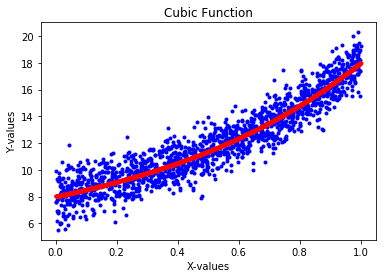

In [2]:
# Visualize our dataset
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(X, y_withNoise, "b.")
plt.plot(X, y, "r.")
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Cubic Function")
plt.show()

In [3]:
# Create a 80/20 train/test split of the dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.2, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

Number samples in training: 1280
Number samples in testing: 320


In [4]:
# Train linear regression model
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Slope/Coefficient:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Slope/Coefficient: [[9.76119326]]
Intercept: [7.05478595]


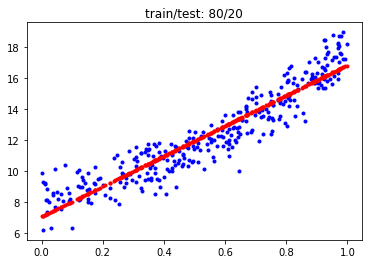

In [5]:
# Visualize predicted versus actual value for the test dataset
y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_predicted, "r.")
plt.title("train/test: 80/20")
plt.show()

In [6]:
# Evaluate model performance on the test dataset
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predicted)

1.08751082380476

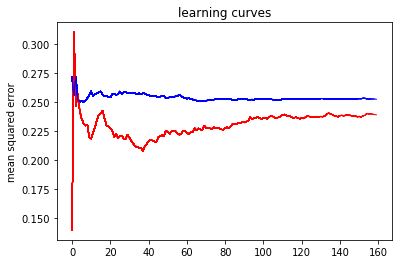

In [8]:
# Plot learning curves
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    train_errors, test_errors = [], []
    for m in range(5, 1280, 8):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        plt.plot(train_errors, 'r-', linewidth=1)
        plt.plot(test_errors, 'b-', linewidth=1)
        plt.ylabel("mean squared error")
        plt.title("learning curves")
        
linear_reg_model = linear_model.LinearRegression()
plot_learning_curves(linear_reg_model, X, y)

Number samples in training: 160
Number samples in testing: 1440
Linear regression equation: y = [[9.84118062]] * X +  [6.9261899]


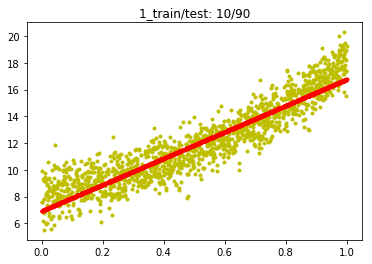

Mean squared error: 1.2728288342163747


In [9]:
# Vary the amount of training data(10/90)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.9, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear regression equation: y =", lr_model.coef_, "* X + ", lr_model.intercept_)

y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("1_train/test: 10/90")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 320
Number samples in testing: 1280
Linear regression equation: y = [[9.782097]] * X +  [7.02711738]


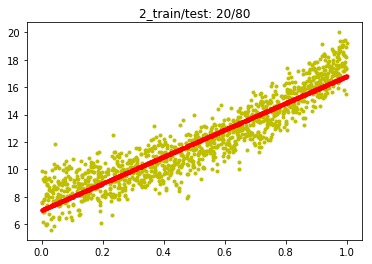

Mean squared error: 1.2528256896534786


In [10]:
# Vary the amount of training data(20/80)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.8, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear regression equation: y =", lr_model.coef_, "* X + ", lr_model.intercept_)

y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("2_train/test: 20/80")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 480
Number samples in testing: 1120
Linear regression equation: y = [[9.8951246]] * X +  [7.01611263]


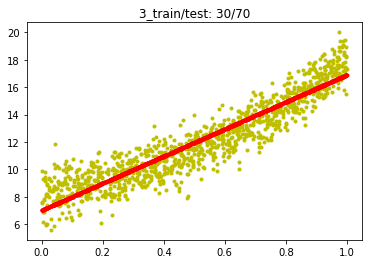

Mean squared error: 1.2429124132800953


In [11]:
# Vary the amount of training data(30/70)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.7, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear regression equation: y =", lr_model.coef_, "* X + ", lr_model.intercept_)

y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("3_train/test: 30/70")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 640
Number samples in testing: 960
Linear regression equation: y = [[9.7712408]] *X +  [7.06635813]


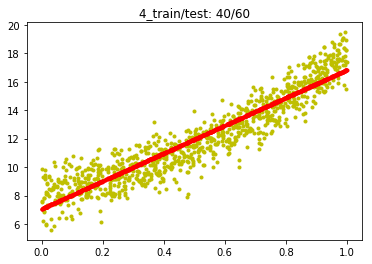

Mean squared error: 1.1721630515244679


In [12]:
# Vary the amount of training data(40/60)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.6, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear regression equation: y =", lr_model.coef_, "*X + ", lr_model.intercept_)

y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("4_train/test: 40/60")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 800
Number samples in testing: 800
Linear regression equation: y = [[9.77900875]] *X +  [7.04851176]


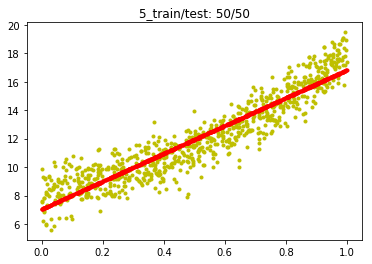

Mean squared error: 1.1975005010903021


In [13]:
# Vary the amount of training data(50/50)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.5, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear regression equation: y =", lr_model.coef_, "*X + ", lr_model.intercept_)

y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("5_train/test: 50/50")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 960
Number samples in testing: 640
Linear regression equation: y = [[9.80675329]] *X +  [7.03892537]


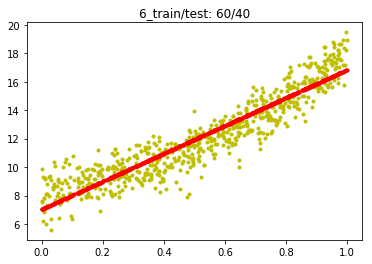

Mean squared error: 1.2104655518107608


In [14]:
# Vary the amount of training data(60/40)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.4, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear regression equation: y =", lr_model.coef_, "*X + ", lr_model.intercept_)

y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("6_train/test: 60/40")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 1120
Number samples in testing: 480
Linear regression equation: y = [[9.77080951]] *X +  [7.05596163]


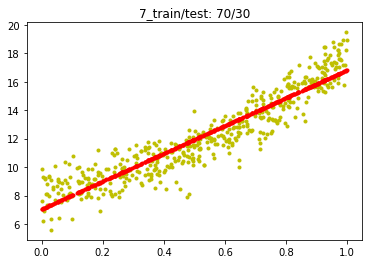

Mean squared error: 1.2356618969348732


In [15]:
# Vary the amount of training data(70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.3, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear regression equation: y =", lr_model.coef_, "*X + ", lr_model.intercept_)

y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("7_train/test: 70/30")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 1360
Number samples in testing: 240
Linear regression equation: y = [[9.68964507]] *X +  [7.10538214]


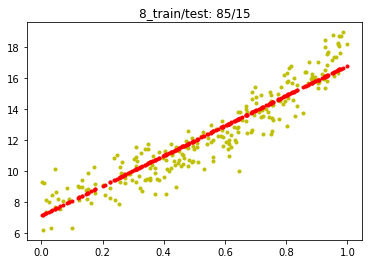

Mean squared error: 1.0908458502767056


In [16]:
# Vary the amount of training data(85/15)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.15, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear regression equation: y =", lr_model.coef_, "*X + ", lr_model.intercept_)

y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("8_train/test: 85/15")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 1440
Number samples in testing: 160
Linear regression equation: y = [[9.68094294]] *X +  [7.09966233]


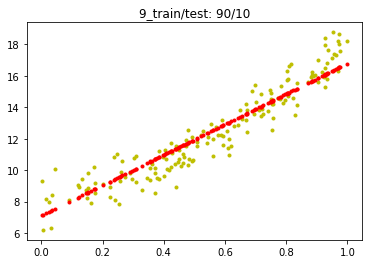

Mean squared error: 0.9818794179606417


In [17]:
# Vary the amount of training data(90/10)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.10, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear regression equation: y =", lr_model.coef_, "*X + ", lr_model.intercept_)

y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("9_train/test: 90/10")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 1520
Number samples in testing: 80
Linear regression equation: y = [[9.70635949]] *X +  [7.08899212]


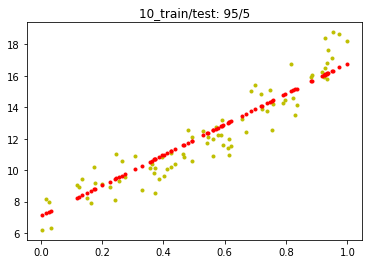

Mean squared error: 1.100979126247624


In [18]:
# Vary the amount of training data(95/5)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.05, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear regression equation: y =", lr_model.coef_, "*X + ", lr_model.intercept_)

y_predicted = lr_model.coef_*X_test + lr_model.intercept_

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("10_train/test: 95/5")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

In [19]:
# Create a 80/20 train/test split of the dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.2, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

Number samples in training: 1280
Number samples in testing: 320


In [20]:
# Create Polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 5, include_bias = False)
X_Poly = poly_reg.fit_transform(X)
print(X.shape)
print(X_Poly.shape)

(1600, 1)
(1600, 5)


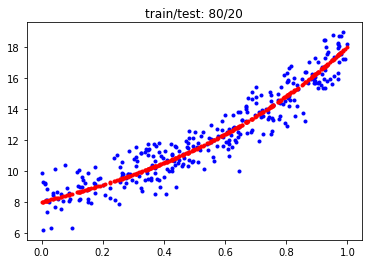

Mean squared error: 0.8170171127224108


In [21]:
lrmodel_2 = linear_model.LinearRegression()
lrmodel_2.fit(X_Poly, y)
y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

# Visualize
plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_predicted, "r.")
plt.title("train/test: 80/20")
plt.show()

# Evaluation
print("Mean squared error:", mean_squared_error(y_test, y_predicted))

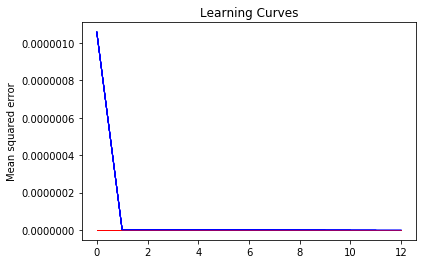

In [35]:
# Plot learning curves
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    train_errors, test_errors = [], []
    for m in range(5, 1280, 100):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        plt.plot(train_errors, 'r-', linewidth=1)
        plt.plot(test_errors, 'b-', linewidth=1)
        plt.ylabel('Mean squared error')
        plt.title('Learning Curves')

plot_learning_curves(lrmodel_2, X_Poly, y)

Number samples in training: 160
Number samples in testing: 1440


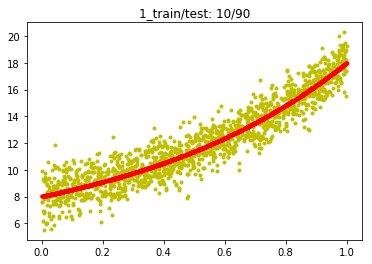

Mean squared error: 0.9865571244965742


In [36]:
# Vary the amount of training data(10/90)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.9, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lrmodel_2 = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree = 5, include_bias = False)
X_Poly = poly_reg.fit_transform(X)
lrmodel_2.fit(X_Poly, y)

y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("1_train/test: 10/90")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 320
Number samples in testing: 1280


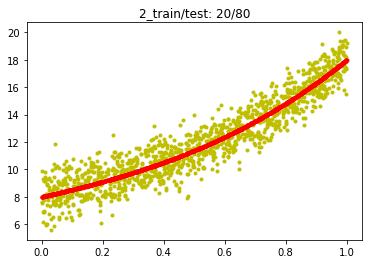

Mean squared error: 0.9717065996449639


In [37]:
# Vary the amount of training data(20/80)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.8, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lrmodel_2 = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree = 5, include_bias = False)
X_Poly = poly_reg.fit_transform(X)
lrmodel_2.fit(X_Poly, y)

y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("2_train/test: 20/80")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 480
Number samples in testing: 1120


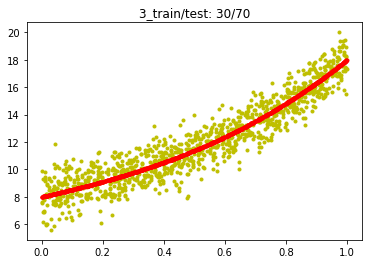

Mean squared error: 0.9554710434782366


In [38]:
# Vary the amount of training data(30/70)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.7, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lrmodel_2 = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree = 5, include_bias = False)
X_Poly = poly_reg.fit_transform(X)
lrmodel_2.fit(X_Poly, y)

y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("3_train/test: 30/70")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 640
Number samples in testing: 960


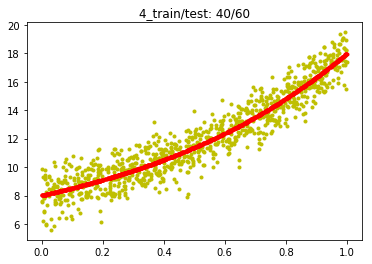

Mean squared error: 0.9094392546352768


In [39]:
# Vary the amount of training data(40/60)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.6, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lrmodel_2 = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree = 5)
X_Poly = poly_reg.fit_transform(X)
lrmodel_2.fit(X_Poly, y)

y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("4_train/test: 40/60")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 800
Number samples in testing: 800


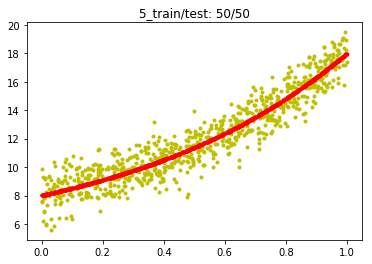

Mean squared error: 0.9158323516243244


In [40]:
# Vary the amount of training data(50/50)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.5, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lrmodel_2 = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree = 5)
X_Poly = poly_reg.fit_transform(X)
lrmodel_2.fit(X_Poly, y)

y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("5_train/test: 50/50")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 960
Number samples in testing: 640


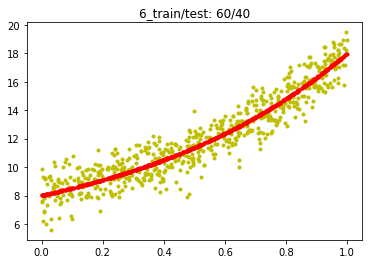

Mean squared error: 0.9175990917206377


In [41]:
# Vary the amount of training data(60/40)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.4, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lrmodel_2 = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree = 5)
X_Poly = poly_reg.fit_transform(X)
lrmodel_2.fit(X_Poly, y)

y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("6_train/test: 60/40")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 1120
Number samples in testing: 480


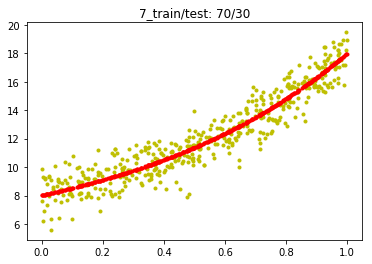

Mean squared error: 0.9298131389951872


In [42]:
# Vary the amount of training data(70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.3, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lrmodel_2 = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree = 5)
X_Poly = poly_reg.fit_transform(X)
lrmodel_2.fit(X_Poly, y)

y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("7_train/test: 70/30")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 1360
Number samples in testing: 240


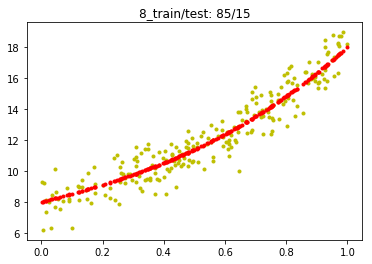

Mean squared error: 0.7880724018860163


In [43]:
# Vary the amount of training data(85/15)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.15, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lrmodel_2 = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree = 5)
X_Poly = poly_reg.fit_transform(X)
lrmodel_2.fit(X_Poly, y)

y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("8_train/test: 85/15")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 1440
Number samples in testing: 160


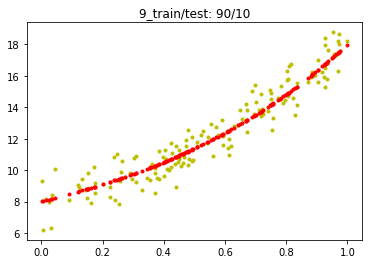

Mean squared error: 0.6984258188873694


In [44]:
# Vary the amount of training data(90/10)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.1, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lrmodel_2 = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree = 5)
X_Poly = poly_reg.fit_transform(X)
lrmodel_2.fit(X_Poly, y)

y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("9_train/test: 90/10")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Number samples in training: 1520
Number samples in testing: 80


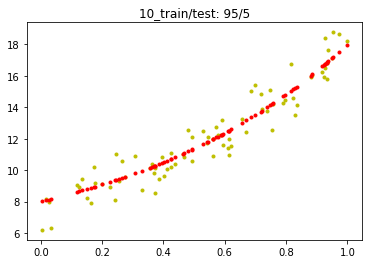

Mean squared error: 0.8169345373700301


In [45]:
# Vary the amount of training data(95/5)
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.05, random_state = 42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

lrmodel_2 = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree = 5)
X_Poly = poly_reg.fit_transform(X)
lrmodel_2.fit(X_Poly, y)

y_predicted = lrmodel_2.predict(poly_reg.fit_transform(X_test))

plt.plot(X_test, y_test, "y.")
plt.plot(X_test, y_predicted, "r.")
plt.title("10_train/test: 95/5")
plt.show()

print("Mean squared error:", mean_squared_error(y_test, y_predicted))

#### Write-up
The graph of linear regression model is a straight line. When split the the dataset into 80/20 train/test, the mean squared error is 1.239419177661406. When changing the weight of training data from 10/100 to 95/100, the mean squared errors are as follows: <br>
&emsp;1.2728288342163747, <br>
&emsp;1.2528256896534786, <br>
&emsp;1.2429124132800953, <br>
&emsp;1.1721630515244679, <br>
&emsp;1.1975005010903021, <br>
&emsp;1.2104655518107608, <br>
&emsp;1.2356618969348732, <br>
&emsp;1.0908458502767056, <br>
&emsp;0.9818794179606417, <br>
&emsp;1.100979126247624.

The graph of polynomial regression model is a curve. When split the the dataset into 80/20 train/test, the mean squared error is 1.0325832605937522. When changing the weight of training data from 10/100 to 95/100, the mean squared errors are as follows: <br>
&emsp;0.9865571244965742, <br>
&emsp;0.9717065996449639, <br>
&emsp;0.9554710434782366, <br>
&emsp;0.9094392546352768, <br>
&emsp;0.9158323516243244, <br>
&emsp;0.9175990917206377, <br>
&emsp;0.9298131389951872, <br>
&emsp;0.7880724018860163, <br>
&emsp;0.6984258188873694, <br>
&emsp;0.8169345373700301.

As we can see from the visualization, the mean squared error of polynomial regression model is smaller than the other one, and its graph is more similar to the original cubic function. That's how I reach the conclusion that polynomial regression model performs better than linear regression model. 

I think the linear regression is underfitting and the polynomial regression fits well. Our data is generated from a cubic function, its graph is a curve not a straight line. In this case, the linear regression model is not that suitable.

When increasing the amount of training data, we can see the general trend of mean squared error decreases gradually on both models. It means we can improve the model's performance by increasing the amount of training data. However, comparing the mean squared error in two models, we can find that MSE is always lower in polynomial model. It means that although we can improve the performance by using more training data, the most fundamental thing is to choose the right model.